In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df=pd.read_csv("C:/Users/Administrator/Downloads/netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [11]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [27]:
df['main_genre']=df['listed_in'].apply(lambda x:x.split(',')[0])
df['org_country']=df['country'].apply(lambda x:x.split(',')[0])
df['num_dur']=df['duration'].str.extract('(\d+)').astype(int)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7848\2222964395.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['num_dur']=df['duration'].str.extract('(\d+)').astype(int)


In [39]:
df[['num_dur']]

,num_dur
0,90
1,1
2,1
3,91
4,125
...,...
8785,2
8786,3
8787,1
8788,1


In [41]:
df=df.drop(columns=['show_id','title','director','date_added'])

In [43]:
le=LabelEncoder()
df['Type_Enc']=le.fit_transform(df['type'])
df['Type_Enc']

0       0
1       1
2       1
3       0
4       0
       ..
8785    1
8786    1
8787    1
8788    1
8789    1
Name: Type_Enc, Length: 8790, dtype: int32

In [45]:
X=df.drop(columns=['type','Type_Enc'])
y=df['Type_Enc']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
num_cols=['release_year','num_dur']
cat_cols=['main_genre','rating','org_country']

preprocessor=ColumnTransformer(
    [
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['release_year', 'num_dur']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['main_genre', 'rating', 'org_country'])])

In [51]:
pipeline=Pipeline(
    [
        ('preprocessor',preprocessor),
        ('classifier',RandomForestClassifier(n_estimators=1000,
                                            random_state=42))
    ]
)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['release_year', 'num_dur']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['main_genre', 'rating',
                                                   'org_country'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=1000, random_state=42))])

In [53]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['release_year', 'num_dur']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['main_genre', 'rating',
                                                   'org_country'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=1000, random_state=42))])

In [55]:
y_pred=pipeline.predict(X_test)
print(y_test)
print('\n')
print(y_pred)

3942    0
8360    1
221     1
4883    0
2210    0
       ..
7149    1
1747    0
4102    0
5758    0
2272    0
Name: Type_Enc, Length: 1758, dtype: int32


[0 1 1 ... 0 0 0]


In [59]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1238
     TV Show       1.00      1.00      1.00       520

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [61]:
print(confusion_matrix(y_test, y_pred))

[[1236    2]
 [   1  519]]


In [95]:
preprocessor=pipeline.named_steps['preprocessor']
encoder=preprocessor.named_transformers_['cat']
feat_enc=encoder.get_feature_names_out()
feat_enc

array(['main_genre_Action & Adventure', 'main_genre_Anime Features',
       'main_genre_Anime Series', 'main_genre_British TV Shows',
       'main_genre_Children & Family Movies',
       'main_genre_Classic & Cult TV', 'main_genre_Classic Movies',
       'main_genre_Comedies', 'main_genre_Crime TV Shows',
       'main_genre_Cult Movies', 'main_genre_Documentaries',
       'main_genre_Docuseries', 'main_genre_Dramas',
       'main_genre_Horror Movies', 'main_genre_Independent Movies',
       'main_genre_International Movies',
       'main_genre_International TV Shows', "main_genre_Kids' TV",
       'main_genre_LGBTQ Movies', 'main_genre_Movies',
       'main_genre_Music & Musicals', 'main_genre_Reality TV',
       'main_genre_Romantic Movies', 'main_genre_Romantic TV Shows',
       'main_genre_Sci-Fi & Fantasy',
       'main_genre_Spanish-Language TV Shows',
       'main_genre_Stand-Up Comedy',
       'main_genre_Stand-Up Comedy & Talk Shows',
       'main_genre_TV Action & Adventure', 

In [97]:
importance=pipeline.named_steps['classifier'].feature_importances_
importance

array([1.00953781e-02, 5.33516755e-01, 1.39441872e-02, 4.90857479e-04,
       1.67045566e-02, 2.92983822e-02, 1.17480177e-02, 1.29093551e-03,
       3.96747353e-04, 2.40267254e-02, 4.53270954e-02, 2.47519605e-05,
       1.66240439e-02, 2.36703295e-02, 3.21664551e-02, 3.67049285e-03,
       1.24558116e-04, 1.57667208e-03, 9.57520139e-02, 4.10146994e-02,
       4.73513881e-08, 9.73315654e-04, 1.44609753e-04, 9.46654515e-03,
       1.42233028e-05, 1.63654735e-03, 6.51157822e-05, 6.27341786e-05,
       6.74757122e-03, 1.87974480e-03, 2.37659153e-03, 1.05551142e-02,
       4.78404249e-03, 3.56995753e-04, 4.02682353e-05, 6.91158141e-04,
       5.41020919e-04, 5.25254145e-05, 7.35912716e-07, 7.57081856e-05,
       1.75298029e-03, 2.85811844e-03, 7.36198429e-03, 1.34803609e-03,
       3.03176474e-04, 1.68313264e-03, 6.18517504e-04, 2.97920404e-03,
       2.58934582e-03, 1.44093290e-06, 5.34599574e-07, 1.37761085e-05,
       9.08157404e-05, 2.12902177e-06, 2.66072922e-07, 1.16113860e-05,
      

In [99]:
all_feat=np.concatenate([feat_enc,num_cols])
all_feat

array(['main_genre_Action & Adventure', 'main_genre_Anime Features',
       'main_genre_Anime Series', 'main_genre_British TV Shows',
       'main_genre_Children & Family Movies',
       'main_genre_Classic & Cult TV', 'main_genre_Classic Movies',
       'main_genre_Comedies', 'main_genre_Crime TV Shows',
       'main_genre_Cult Movies', 'main_genre_Documentaries',
       'main_genre_Docuseries', 'main_genre_Dramas',
       'main_genre_Horror Movies', 'main_genre_Independent Movies',
       'main_genre_International Movies',
       'main_genre_International TV Shows', "main_genre_Kids' TV",
       'main_genre_LGBTQ Movies', 'main_genre_Movies',
       'main_genre_Music & Musicals', 'main_genre_Reality TV',
       'main_genre_Romantic Movies', 'main_genre_Romantic TV Shows',
       'main_genre_Sci-Fi & Fantasy',
       'main_genre_Spanish-Language TV Shows',
       'main_genre_Stand-Up Comedy',
       'main_genre_Stand-Up Comedy & Talk Shows',
       'main_genre_TV Action & Adventure', 

In [101]:
feat_df=pd.DataFrame({'Features':all_feat,'Importance':importance})
feat_df

,Features,Importance
0,main_genre_Action & Adventure,1.009538e-02
1,main_genre_Anime Features,5.335168e-01
2,main_genre_Anime Series,1.394419e-02
3,main_genre_British TV Shows,4.908575e-04
4,main_genre_Children & Family Movies,1.670456e-02
...,...,...
130,org_country_Vietnam,6.716752e-06
131,org_country_West Germany,7.137507e-08
132,org_country_Zimbabwe,1.396661e-06
133,release_year,2.233634e-09


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7848\819216487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Features', data=feat_df, palette='viridis')


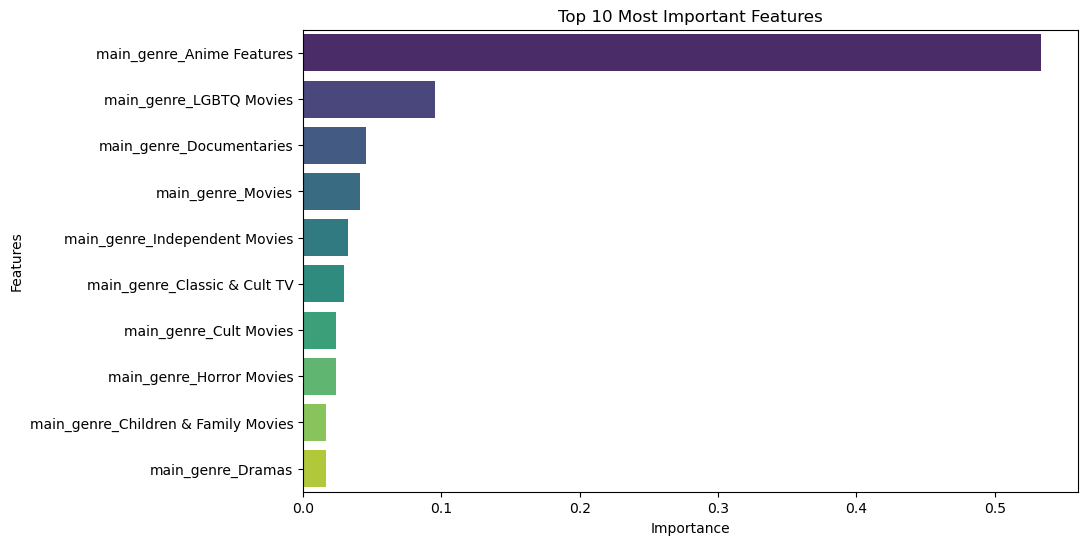

In [105]:
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=feat_df, palette='viridis')
plt.title("Top 10 Most Important Features")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7848\1671224309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


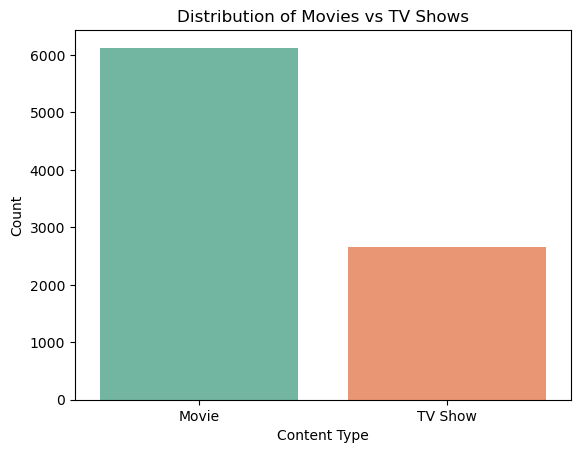

In [107]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7848\1629396120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')


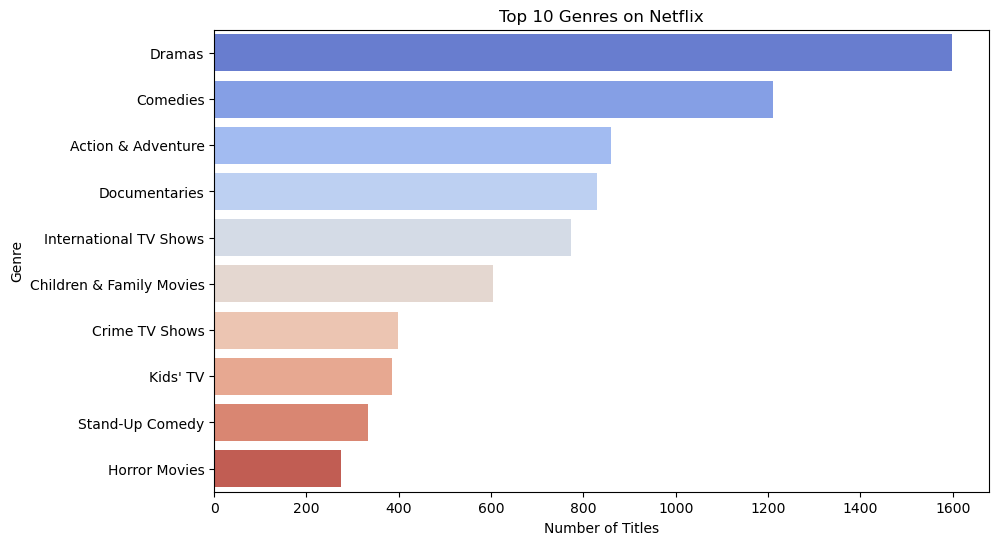

In [115]:
df['main_genre'] = df['listed_in'].apply(lambda x: str(x).split(',')[0])

top_genres = df['main_genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

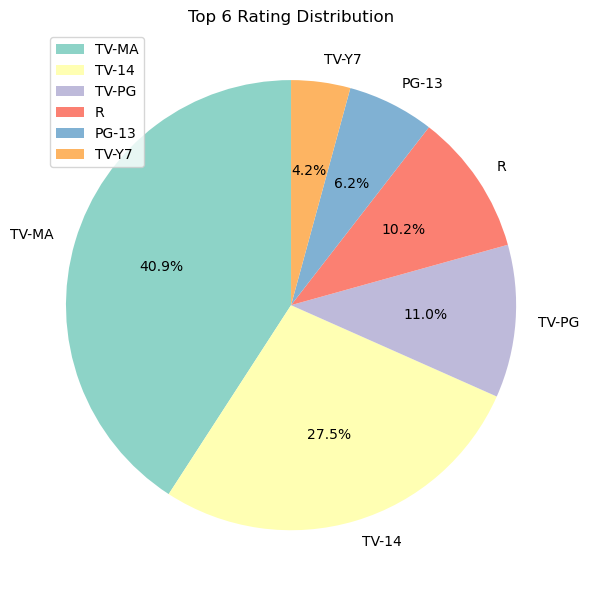

In [121]:
rating_dist = df['rating'].value_counts().head(6)

plt.figure(figsize=(6,6))
plt.pie(rating_dist.values, labels=rating_dist.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title("Top 6 Rating Distribution")
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

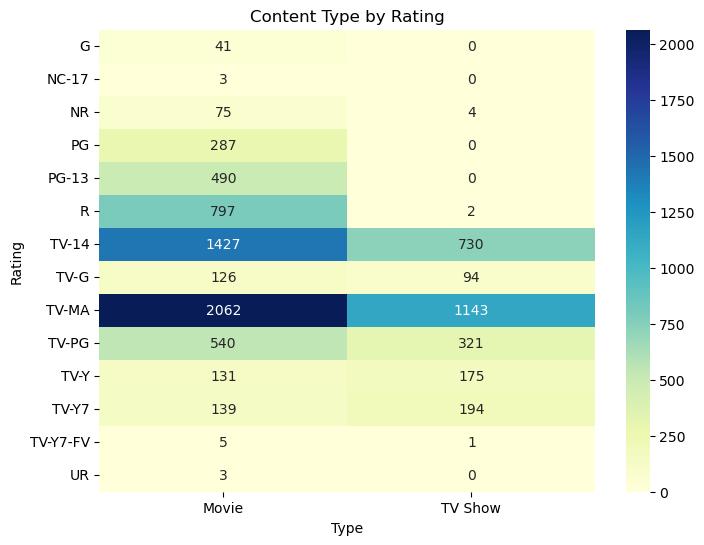

In [123]:
pivot = pd.crosstab(df['rating'], df['type'])

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Content Type by Rating")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()

In [127]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/301.2 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/301.2 kB 1.3 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.4 MB/s eta 0:00:00


In [131]:
df

,type,country,release_year,rating,duration,listed_in,main_genre,org_country,org_dur,Type_Enc,num_dur
0,Movie,United States,2020,PG-13,90 min,Documentaries,Documentaries,United States,Documentaries,0,90
1,TV Show,France,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,France,Crime TV Shows,1,1
2,TV Show,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,United States,TV Dramas,1,1
3,Movie,Brazil,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Brazil,Children & Family Movies,0,91
4,Movie,United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,United States,Dramas,0,125
...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Turkey,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,Turkey,International TV Shows,1,2
8786,TV Show,United States,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,United States,Kids' TV,1,3
8787,TV Show,Pakistan,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Pakistan,International TV Shows,1,1
8788,TV Show,Pakistan,2016,TV-Y,1 Season,Kids' TV,Kids' TV,Pakistan,Kids' TV,1,1


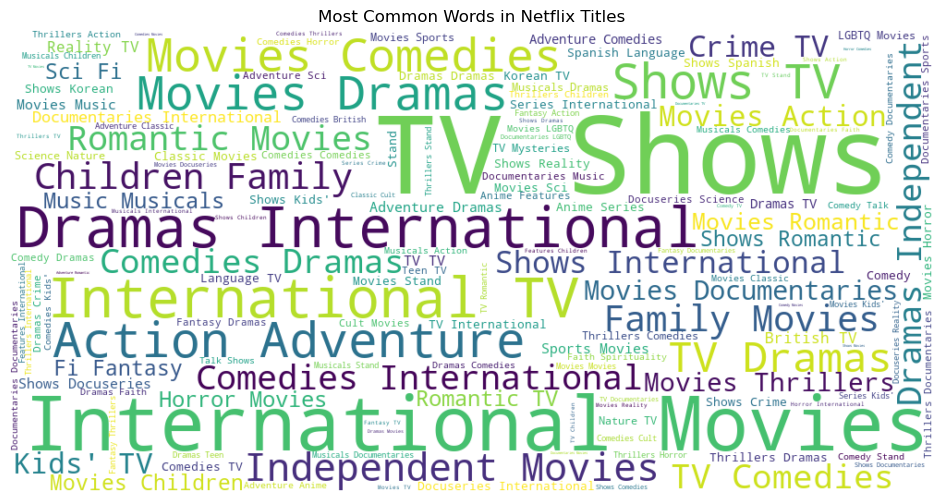

In [133]:
from wordcloud import WordCloud

text = " ".join(df['listed_in'].dropna().astype(str))
wc = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflix Titles")
plt.show()